# Team One: The Opioid Crisis in the United States - Data Cleanup

###### Development team notes and caveats:
* Question 1: Data was extracted from https://wonder.cdc.gov/   Rather than extracting data in one large chunk and disassembling with code, I downloaded into individual tab separated text files. This was becuase I noticed some anomalies when extracting data from Wonder in large comingled batches; most likely due to the grouping functionality used by the Wonder tool. If I can find and access the raw data behind the Wonder site, I will modify this notebook.
* Question 2:
* Question 3:
* Question 4:

#### Dependencies

In [1]:
import os                                                                    # os library

In [2]:
import numpy as np                                                           # numpy library

In [3]:
import pandas as pd                                                          # pandas library

In [4]:
import json                                                                  # json library

In [5]:
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm                                                 # for running regressions

C:\Users\K Y\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Research Question 1: clean up raw data and export to csv or JSON for use by main notebook

In [6]:
filename = 'Q1DS1_Year.txt'                                                  # 1st raw data file
rawdata_file = os.path.join(".", "Data Files", "Question_1", filename)       # creates path to read data
q1ds1_df = pd.read_csv(rawdata_file, sep='\t')                               # reads data from file

In [7]:
q1ds1_df.head()                                                              # displays raw data

,Notes,Year,Year Code,Deaths,Population,Crude Rate
0,NaN,1999.0,1999.0,5594.0,279040168.0,2.0
1,NaN,2000.0,2000.0,6011.0,281421906.0,2.1
2,NaN,2001.0,2001.0,7088.0,284968955.0,2.5
3,NaN,2002.0,2002.0,9318.0,287625193.0,3.2
4,NaN,2003.0,2003.0,10389.0,290107933.0,3.6


In [8]:
q1ds1_df.drop('Notes', axis=1, inplace=True)                                 # drops Notes column
q1ds1_df.dropna(axis=0, how='any', inplace=True)                             # drops rows with NaN
q1ds1_df['Year'] = q1ds1_df['Year'].astype(int)                              # casts datatypes for columns
q1ds1_df['Year Code'] = q1ds1_df['Year Code'].astype(int)
q1ds1_df['Year Code'] = q1ds1_df['Year Code'].astype(str)
q1ds1_df['Deaths'] = q1ds1_df['Deaths'].astype(int)
q1ds1_df['Population'] = q1ds1_df['Population'].astype(int)

# Calculates death rate per 100,000 of population (Deaths / Population) * 100,000
q1ds1_df['Death Rate'] = q1ds1_df['Deaths'] /  q1ds1_df['Population'] * 100000
q1ds1_df.drop('Crude Rate', axis=1, inplace=True)                            # drops Crude Rate column
q1ds1_df.set_index('Year', inplace=True)                                     # reindexes by Year

In [9]:
q1ds1_df.head()                                                              # displays cleaned dataframe

,Year Code,Deaths,Population,Death Rate
Year,,,,
1999,1999,5594,279040168,2.004729
2000,2000,6011,281421906,2.135939
2001,2001,7088,284968955,2.487288
2002,2002,9318,287625193,3.239633
2003,2003,10389,290107933,3.581081


In [10]:
filename = 'Q1DS1.csv'                                                       # 1st cleaned data file
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to write data
q1ds1_df.to_csv(csv_file)                                                    # writes cleaned data to csv

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
filename = 'Q1DS2_Sanity.txt'                                                # 2nd raw data file
rawdata_file = os.path.join(".", "Data Files", "Question_1", filename)       # creates path to read data
q1ds2_df = pd.read_csv(rawdata_file, sep='\t')                               # reads data from file

In [12]:
q1ds2_df.head()                                                              # displays raw data

,Notes,Year,Year Code,Deaths,Population,Crude Rate
0,NaN,1999.0,1999.0,101.0,279040168.0,0.0
1,NaN,2000.0,2000.0,92.0,281421906.0,0.0
2,NaN,2001.0,2001.0,98.0,284968955.0,0.0
3,NaN,2002.0,2002.0,164.0,287625193.0,0.1
4,NaN,2003.0,2003.0,121.0,290107933.0,0.0


In [13]:
q1ds2_df.drop('Notes', axis=1, inplace=True)                                 # drops Notes column
q1ds2_df.dropna(axis=0, how='any', inplace=True)                             # drops rows with NaN
q1ds2_df['Year'] = q1ds2_df['Year'].astype(int)                              # casts datatypes for columns
q1ds2_df['Year Code'] = q1ds2_df['Year Code'].astype(int)
q1ds2_df['Year Code'] = q1ds2_df['Year Code'].astype(str)
q1ds2_df['Deaths'] = q1ds2_df['Deaths'].astype(int)
q1ds2_df['Population'] = q1ds2_df['Population'].astype(int)

# Calculates death rate per 100,000 of population (Deaths / Population) * 100,000
q1ds2_df['Death Rate'] = q1ds2_df['Deaths'] /  q1ds2_df['Population'] * 100000
q1ds2_df.drop('Crude Rate', axis=1, inplace=True)                            # drops Crude Rate column
q1ds2_df.set_index('Year', inplace=True)                                     # reindexes by Year

In [14]:
q1ds2_df.head()                                                              # displays cleaned dataframe

,Year Code,Deaths,Population,Death Rate
Year,,,,
1999,1999,101,279040168,0.036196
2000,2000,92,281421906,0.032691
2001,2001,98,284968955,0.034390
2002,2002,164,287625193,0.057019
2003,2003,121,290107933,0.041709


In [15]:
filename = 'Q1DS2.csv'                                                       # 2nd cleaned data file
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to write data
q1ds2_df.to_csv(csv_file)                                                    # writes cleaned data to csv

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
filename = 'Q1DS3_Gender.txt'                                                # 3rd raw data file
rawdata_file = os.path.join(".", "Data Files", "Question_1", filename)       # creates path to read data
q1ds3_df = pd.read_csv(rawdata_file, sep='\t')                               # reads data from file

In [17]:
q1ds3_df.head()                                                              # displays raw data

,Notes,Gender,Gender Code,Deaths,Population,Crude Rate,Age Adjusted Rate
0,NaN,Female,F,109681.0,2.763844e+09,4.0,4.0
1,NaN,Male,M,204081.0,2.671903e+09,7.6,7.6
2,Total,NaN,NaN,313762.0,5.435746e+09,5.8,5.8
3,---,NaN,NaN,NaN,NaN,NaN,NaN
4,"Dataset: Multiple Cause of Death, 1999-2016",NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
q1ds3_df.drop('Notes', axis=1, inplace=True)                                 # drops Notes column
q1ds3_df.dropna(axis=0, how='any', inplace=True)                             # drops rows with NaN
q1ds3_df['Deaths'] = q1ds3_df['Deaths'].astype(int)                          # casts datatypes for columns

# Calculates death rate per 100,000 of population (Deaths / Population) * 100,000
q1ds3_df['Death Rate'] = q1ds3_df['Deaths'] /  q1ds3_df['Population'] * 100000
q1ds3_df.drop('Crude Rate', axis=1, inplace=True)                            # drops Crude Rate column
q1ds3_df.drop('Age Adjusted Rate', axis=1, inplace=True)                     # drops Age Adj rate column

In [19]:
q1ds3_df.head()                                                              # displays cleaned dataframe

,Gender,Gender Code,Deaths,Population,Death Rate
0,Female,F,109681,2.763844e+09,3.968422
1,Male,M,204081,2.671903e+09,7.638041


In [20]:
filename = 'Q1DS3.csv'                                                       # 3rd cleaned data file
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to write data
q1ds3_df.to_csv(csv_file)                                                    # writes cleaned data to csv

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [21]:
filename = 'Q1DS4_Age.txt'                                                   # 4th raw data file
rawdata_file = os.path.join(".", "Data Files", "Question_1", filename)       # creates path to read data
q1ds4_df = pd.read_csv(rawdata_file, sep='\t')                               # reads data from file

In [22]:
q1ds4_df.head()                                                              # displays raw data

,Notes,Ten-Year Age Groups,Ten-Year Age Groups Code,Deaths,Population,Crude Rate
0,NaN,< 1 year,1,158.0,71608191,0.2
1,NaN,1-4 years,1-4,425.0,285248834,0.1
2,NaN,5-14 years,5-14,436.0,737079143,0.1
3,NaN,15-24 years,15-24,32545.0,764330433,4.3
4,NaN,25-34 years,25-34,71071.0,737039056,9.6


In [23]:
q1ds4_df.drop('Notes', axis=1, inplace=True)                                 # drops Notes column
q1ds4_df.dropna(axis=0, how='any', inplace=True)                             # drops rows with NaN
q1ds4_df.drop(q1ds4_df.index[-1], inplace=True)                              # drops age not stated row
q1ds4_df['Deaths'] = q1ds4_df['Deaths'].astype(int)                          # casts datatypes for columns
q1ds4_df['Population'] = q1ds4_df['Population'].astype(int)

# Calculates death rate per 100,000 of population (Deaths / Population) * 100,000
q1ds4_df['Death Rate'] = q1ds4_df['Deaths'] /  q1ds4_df['Population'] * 100000
q1ds4_df.drop('Crude Rate', axis=1, inplace=True)                            # drops Crude Rate column

In [24]:
q1ds4_df.head()                                                              # displays cleaned dataframe

,Ten-Year Age Groups,Ten-Year Age Groups Code,Deaths,Population,Death Rate
0,< 1 year,1,158,71608191,0.220645
1,1-4 years,1-4,425,285248834,0.148993
2,5-14 years,5-14,436,737079143,0.059152
3,15-24 years,15-24,32545,764330433,4.257975
4,25-34 years,25-34,71071,737039056,9.642773


In [25]:
filename = 'Q1DS4.csv'                                                       # 4th cleaned data file
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to write data
q1ds4_df.to_csv(csv_file)                                                    # writes cleaned data to csv

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [26]:
filename = 'Q1DS5_Race.txt'                                                  # 5th raw data file
rawdata_file = os.path.join(".", "Data Files", "Question_1", filename)       # creates path to read data
q1ds5_df = pd.read_csv(rawdata_file, sep='\t')                               # reads data from file

In [27]:
q1ds5_df.head()                                                              # displays raw data

,Notes,Race,Race Code,Deaths,Population,Crude Rate,Age Adjusted Rate
0,NaN,American Indian or Alaska Native,1002-5,3578.0,6.924957e+07,5.2,5.4
1,NaN,Asian or Pacific Islander,A-PI,1986.0,2.848739e+08,0.7,0.6
2,NaN,Black or African American,2054-5,24111.0,7.331076e+08,3.3,3.4
3,NaN,White,2106-3,284087.0,4.348515e+09,6.5,6.6
4,Total,NaN,NaN,313762.0,5.435746e+09,5.8,5.8


In [28]:
q1ds5_df.drop('Notes', axis=1, inplace=True)                                 # drops Notes column
q1ds5_df.dropna(axis=0, how='any', inplace=True)                             # drops rows with NaN
q1ds5_df['Deaths'] = q1ds5_df['Deaths'].astype(int)                          # casts datatypes for columns

# Calculates death rate per 100,000 of population (Deaths / Population) * 100,000
q1ds5_df['Death Rate'] = q1ds5_df['Deaths'] /  q1ds5_df['Population'] * 100000
q1ds5_df.drop('Crude Rate', axis=1, inplace=True)                            # drops Crude Rate column
q1ds5_df.drop('Age Adjusted Rate', axis=1, inplace=True)                     # drops Age Adj rate column
q1ds5_df.sort_values(by=['Death Rate'], ascending=False, inplace=True)       # sorts data (descending)

In [29]:
q1ds5_df.head()                                                              # displays cleaned dataframe

,Race,Race Code,Deaths,Population,Death Rate
3,White,2106-3,284087,4.348515e+09,6.532965
0,American Indian or Alaska Native,1002-5,3578,6.924957e+07,5.166819
2,Black or African American,2054-5,24111,7.331076e+08,3.288876
1,Asian or Pacific Islander,A-PI,1986,2.848739e+08,0.697151


In [30]:
filename = 'Q1DS5.csv'                                                       # 5th cleaned data file
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to write data
q1ds5_df.to_csv(csv_file)                                                    # writes cleaned data to csv

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [31]:
filename = 'Q1DS6_County.txt'                                                # 6th raw data file
rawdata_file = os.path.join(".", "Data Files", "Question_1", filename)       # creates path to read data
q1ds6_df = pd.read_csv(rawdata_file, sep='\t')                               # reads data from file

In [32]:
q1ds6_df.head()                                                              # displays raw data

,Notes,County,County Code,Deaths,Population,Crude Rate
0,NaN,"Baldwin County, AL",1003.0,185.0,3104213.0,6.0
1,NaN,"Bibb County, AL",1007.0,12.0,397480.0,Unreliable
2,NaN,"Blount County, AL",1009.0,44.0,997776.0,4.4
3,NaN,"Calhoun County, AL",1015.0,12.0,2074478.0,Unreliable
4,NaN,"Cherokee County, AL",1019.0,13.0,455087.0,Unreliable


In [33]:
q1ds6_df.drop('Notes', axis=1, inplace=True)                                 # drops Notes column
q1ds6_df.dropna(axis=0, how='any', inplace=True)                             # drops rows with NaN
q1ds6_df['Deaths'] = q1ds6_df['Deaths'].astype(int)                          # casts datatypes for columns
q1ds6_df['Population'] = q1ds6_df['Population'].astype(int)
q1ds6_df['County Code'] = q1ds6_df['County Code'].astype(int)
q1ds6_df['County Code'] = q1ds6_df['County Code'].astype(str)

# Calculates death rate per 100,000 of population (Deaths / Population) * 100,000
q1ds6_df['Death Rate'] = q1ds6_df['Deaths'] /  q1ds6_df['Population'] * 100000
q1ds6_df.drop('Crude Rate', axis=1, inplace=True)                            # drops Crude Rate column

In [34]:
q1ds6_df.head()                                                              # displays cleaned dataframe

,County,County Code,Deaths,Population,Death Rate
0,"Baldwin County, AL",1003,185,3104213,5.959643
1,"Bibb County, AL",1007,12,397480,3.019020
2,"Blount County, AL",1009,44,997776,4.409807
3,"Calhoun County, AL",1015,12,2074478,0.578459
4,"Cherokee County, AL",1019,13,455087,2.856597


In [35]:
filename = 'Q1DS6.csv'                                                       # 6th cleaned data file
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to write data
q1ds6_df.to_csv(csv_file)                                                    # writes cleaned data to csv

In [36]:
q1ds6_df.drop('County', axis=1, inplace=True)                                # drops unneeded columns
q1ds6_df.drop('Deaths', axis=1, inplace=True)                                 
q1ds6_df.drop('Population', axis=1, inplace=True)
q1ds6_df.set_index('County Code', inplace=True)                              # reindexes by County Code

In [37]:
q1ds6_df['Rate Bin'] = float(1)                                              # add new column to dataframe
q1ds6_df.loc[q1ds6_df['Death Rate'] > 3, 'Rate Bin'] = float(2)              # assigns bin values to death rates by range
q1ds6_df.loc[q1ds6_df['Death Rate'] > 6, 'Rate Bin'] = float(3)
q1ds6_df.loc[q1ds6_df['Death Rate'] > 9, 'Rate Bin'] = float(4)
q1ds6_df.loc[q1ds6_df['Death Rate'] > 12, 'Rate Bin'] = float(5)
q1ds6_df.drop('Death Rate', axis=1, inplace=True)                            # drops unneeded column

In [38]:
q1ds6_df.head()                                                              # displays cleaned JSON data

,Rate Bin
County Code,
1003,2.0
1007,2.0
1009,2.0
1015,1.0
1019,1.0


In [39]:
json_dict = {}                                                               # initializes empty dict 

for index, row in q1ds6_df.iterrows():                                       # iterates through dataframe
    if index not in json_dict:                                               # checks for duplicates...
        json_dict[index] = row[0]                                            # adds data to dictionary

In [40]:
filename = 'Q1DS6.json'                                                      # 6th cleaned json data file
json_file = os.path.join(".", "Data Files", "Question_1", filename)          # creates path to write data

with open(json_file, "w") as f:                                              # opens file in write mode
    f.write(json.dumps(json_dict))                                           # writes json data to file 

#### Research Question 2: clean up raw data and export

#### Research Question 3: clean up raw data and export

In [41]:

# import datasets
csv_OpDeaths = r'Data Files/raw_data-KFF_opioid_death_csv.csv' 
csv_UrbPop = r'Data Files/pop-urban-pct-historical_cleaned_up.csv'

# Read in the csv files, skipping titles and footer notes
OpDeaths_df = pd.read_csv(csv_OpDeaths, engine='python', skiprows=[0, 1], skipfooter=13) 
UrbPop_df = pd.read_csv(csv_UrbPop, engine='python', skipfooter=7)


# change NSD and NR into NaN
OpDeaths_df = OpDeaths_df.replace(['NSD', 'NR'], np.nan)

OpDeaths_df.tail()



,Location,1999__Opioid Overdose Death Rate (Age-Adjusted),2000__Opioid Overdose Death Rate (Age-Adjusted),2001__Opioid Overdose Death Rate (Age-Adjusted),2002__Opioid Overdose Death Rate (Age-Adjusted),2003__Opioid Overdose Death Rate (Age-Adjusted),2004__Opioid Overdose Death Rate (Age-Adjusted),2005__Opioid Overdose Death Rate (Age-Adjusted),2006__Opioid Overdose Death Rate (Age-Adjusted),2007__Opioid Overdose Death Rate (Age-Adjusted),2008__Opioid Overdose Death Rate (Age-Adjusted),2009__Opioid Overdose Death Rate (Age-Adjusted),2010__Opioid Overdose Death Rate (Age-Adjusted),2011__Opioid Overdose Death Rate (Age-Adjusted),2012__Opioid Overdose Death Rate (Age-Adjusted),2013__Opioid Overdose Death Rate (Age-Adjusted),2014__Opioid Overdose Death Rate (Age-Adjusted),2015__Opioid Overdose Death Rate (Age-Adjusted)
47,Virginia,2.7,3.4,4.2,4.7,4.8,5.1,4.7,5.3,6.4,6.2,5.9,4.8,7.1,6.5,7.6,9.1,9.9
48,Washington,5.9,5.8,5.3,7.4,7.5,9,9.2,10,9.7,10.1,10.2,8.9,9.9,9.7,8.9,9.2,9.3
49,West Virginia,1.8,2.8,7.9,10.1,11.2,14.2,8.2,16.1,19,21.0,10.3,25.6,31.5,27.1,27.9,31.6,36.0
50,Wisconsin,1.6,2.1,2.6,3.2,3.7,4,4.9,6,6.7,6.6,6.9,7.3,8.3,8.6,10.6,11.1,11.2
51,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,7.6,5.7,8.5,7.5,7.7,8.6,9.3,7.9


In [42]:
# preparing UrbPop_df for merging and making sure there are 52 entries (50 states + DC + US overall)
UrbPop_df = UrbPop_df.rename(columns={'Area Name':'Location'}) 
UrbPop_df.head()

,FIPS,Location,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
0,0,United States,39.6,45.6,51.2,56.1,56.5,64.0,69.9,73.6,73.7,75.2,79.0,80.7
1,1,Alabama,11.9,17.3,21.7,28.1,30.2,43.8,54.8,58.6,60.0,60.4,55.4,59.0
2,2,Alaska,24.5,9.5,5.6,13.2,24.0,26.6,37.9,56.9,64.3,67.5,65.6,66.0
3,4,Arizona,15.9,31.0,36.1,34.4,34.8,55.5,74.5,79.6,83.8,87.5,88.2,89.8
4,5,Arkansas,8.5,12.9,16.6,20.6,22.2,33.0,42.8,50.0,51.6,53.5,52.5,56.2


In [43]:
# merging UrbPop_df and OpDeaths_df. This ensures that the data matches for each state. 
OpDeaths_Urb_df = pd.merge(OpDeaths_df, UrbPop_df, on='Location')
OpDeaths_Urb_df = OpDeaths_Urb_df.drop(OpDeaths_Urb_df.index[0]) #dropping US total
OpDeaths_Urb_df.head()

,Location,1999__Opioid Overdose Death Rate (Age-Adjusted),2000__Opioid Overdose Death Rate (Age-Adjusted),2001__Opioid Overdose Death Rate (Age-Adjusted),2002__Opioid Overdose Death Rate (Age-Adjusted),2003__Opioid Overdose Death Rate (Age-Adjusted),2004__Opioid Overdose Death Rate (Age-Adjusted),2005__Opioid Overdose Death Rate (Age-Adjusted),2006__Opioid Overdose Death Rate (Age-Adjusted),2007__Opioid Overdose Death Rate (Age-Adjusted),...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
1,Alabama,0.8,1,1.3,1.6,1.1,1.8,1.8,2.7,3.6,...,21.7,28.1,30.2,43.8,54.8,58.6,60.0,60.4,55.4,59.0
2,Alaska,4,4,NaN,NaN,NaN,NaN,NaN,4.1,NaN,...,5.6,13.2,24.0,26.6,37.9,56.9,64.3,67.5,65.6,66.0
3,Arizona,4.7,4.8,5.2,6.2,6.4,6.3,6.6,7.8,7.7,...,36.1,34.4,34.8,55.5,74.5,79.6,83.8,87.5,88.2,89.8
4,Arkansas,1.1,0.8,1.1,3.5,3.4,4.8,4.6,5.1,5.4,...,16.6,20.6,22.2,33.0,42.8,50.0,51.6,53.5,52.5,56.2
5,California,4.5,3,1.6,4.2,4,4,3.8,4.1,4.5,...,67.9,73.3,71.0,80.7,86.4,90.9,91.3,92.6,94.4,95.0


In [44]:
# exporting cleaned up OpDeaths to csv

filename = 'OpiodDeathsUrbanPop.csv'                                                  
csv_file = os.path.join(".", "Data Files", "Question_3", filename)           
OpDeaths_Urb_df.to_csv(csv_file) 

In [45]:
# dfs for the years 2000 and 2010 (the years where census data is available):
# df Opioid deaths 2000
OpDeathsDelta_df = pd.DataFrame(\
                          data = OpDeaths_Urb_df,\
                          columns=['Location', '2000__Opioid Overdose Death Rate (Age-Adjusted)',\
                                   '2010__Opioid Overdose Death Rate (Age-Adjusted)', '2010'])
OpDeathsDelta_df = OpDeathsDelta_df.dropna()

# Opioid Death rate is not numeric. Change to numeric so scatter plot works 
OpDeathsDelta_df['2000__Opioid Overdose Death Rate (Age-Adjusted)']=\
    OpDeathsDelta_df['2000__Opioid Overdose Death Rate (Age-Adjusted)'].apply(pd.to_numeric)
OpDeathsDelta_df['2010__Opioid Overdose Death Rate (Age-Adjusted)']=\
    OpDeathsDelta_df['2010__Opioid Overdose Death Rate (Age-Adjusted)'].apply(pd.to_numeric)

# get change in death rate from 2000 to 2010 
OpDeathsDelta_df['Change in Death'] = OpDeathsDelta_df['2010__Opioid Overdose Death Rate (Age-Adjusted)']\
    - OpDeathsDelta_df['2000__Opioid Overdose Death Rate (Age-Adjusted)']

OpDeathsDelta_df.tail()

,Location,2000__Opioid Overdose Death Rate (Age-Adjusted),2010__Opioid Overdose Death Rate (Age-Adjusted),2010,Change in Death
46,Vermont,3.6,6.8,38.9,3.2
47,Virginia,3.4,4.8,75.5,1.4
48,Washington,5.8,8.9,84.1,3.1
49,West Virginia,2.8,25.6,48.7,22.8
50,Wisconsin,2.1,7.3,70.2,5.2


In [46]:
# save OpDeathsDelta_df as csv file 

filename = 'ChangeOpiodDeaths(00-10).csv'                                                  
csv_file = os.path.join(".", "Data Files", "Question_3", filename)           
OpDeathsDelta_df.to_csv(csv_file) 

#### -Crime and Opioids

In [47]:
#importing crime data
csv_violent1999 = "Data Files\ViolentCrimeState1999.csv"
csv_violent2014 = r'Data Files\ViolentCrimeState2014.csv'
csv_property1999 = 'Data Files\PropertyCrimeState1999.csv'
csv_property2014 = r'Data Files\PropertyCrimeStates2014.csv'

# Read in the csv files, skipping titles (skipfooter isn't working for some reason)
violent1999_df = pd.read_csv(csv_violent1999, skiprows=9)
violent2014_df = pd.read_csv(csv_violent2014, skiprows=9)
property1999_df = pd.read_csv(csv_property1999, skiprows=9)
property2014_df = pd.read_csv(csv_property2014, skiprows=9)

#clean up footers or any row with 4 null values. Also adds year as suffix to distinguish values when merge later
violent1999_df = violent1999_df.dropna(thresh=4).add_suffix('_1999')
violent2014_df = violent2014_df.dropna(thresh=4).add_suffix('_2014')
property1999_df = property1999_df.dropna(thresh=4).add_suffix('_1999')
property2014_df = property2014_df.dropna(thresh=4).add_suffix('_2014')

#removes year from State column 
violent1999_df = violent1999_df.rename(columns={'State_1999':'State'})
violent2014_df = violent2014_df.rename(columns={'State_2014':'State'})
property1999_df = property1999_df.rename(columns={'State_1999':'State'})
property2014_df = property2014_df.rename(columns={'State_2014':'State'})

# change values as numeric
violent1999_df = violent1999_df.apply(pd.to_numeric, errors='ignore')  
violent2014_df = violent2014_df.apply(pd.to_numeric, errors='ignore')  
property1999_df = property1999_df.apply(pd.to_numeric, errors='ignore')
property2014_df = property2014_df.apply(pd.to_numeric, errors='ignore')

#drop US total value
violent1999_df = violent1999_df[:-1] #US total is at the last row for each of the crime df
violent2014_df = violent2014_df[:-1]
property1999_df = property1999_df[:-1]
property2014_df = property2014_df[:-1]

property2014_df.tail()

,State,Population_2014,Property crime rate_2014,Burglary rate_2014,Larceny-theft rate_2014,Motor vehicle theft rate_2014,Unnamed: 6_2014
46,Virginia,8326289,1930.3,277.7,1560.5,92.1,NaN
47,Washington,7061530,3706.1,783.0,2489.1,434.0,NaN
48,West Virginia,1850326,2034.7,484.9,1447.3,102.5,NaN
49,Wisconsin,5757564,2088.3,368.5,1547.6,172.3,NaN
50,Wyoming,584153,1964.7,289.1,1572.4,103.2,NaN


In [48]:
# Crime dataframes for each crime type
violent_df = violent1999_df.merge(violent2014_df, on='State')
property_df = property1999_df.merge(property2014_df, on='State')

# get change in violent crimes, as well as change in robbery rates 
violent_df['Violent Crime rate_change'] = violent_df['Violent Crime rate_2014'] - violent_df['Violent Crime rate_1999']
violent_df['Robbery rate_change'] = violent_df['Robbery rate_2014'] - violent_df['Robbery rate_1999']

#get change in property crime rates
property_df['Property crime rate_change'] = property_df['Property crime rate_2014']\
                                            - property_df['Property crime rate_1999']

violent_df.tail()

,State,Population_1999,Violent Crime rate_1999,Murder and nonnegligent manslaughter rate_1999,Legacy rape rate /1_1999,Revised rape rate /2_1999,Robbery rate_1999,Aggravated assault rate_1999,Unnamed: 8_1999,Population_2014,Violent Crime rate_2014,Murder and nonnegligent manslaughter rate_2014,Legacy rape rate /1_2014,Revised rape rate /2_2014,Robbery rate_2014,Aggravated assault rate_2014,Unnamed: 8_2014,Violent Crime rate_change,Robbery rate_change
46,Virginia,6872912,314.7,5.7,25.0,NaN,101.1,182.8,NaN,8326289,196.2,4.1,17.2,27.7,51.5,112.9,NaN,-118.5,-49.6
47,Washington,5756361,377.3,3.0,47.1,NaN,100.9,226.3,NaN,7061530,285.2,2.5,30.7,38.2,79.9,164.7,NaN,-92.1,-21.0
48,West Virginia,1806928,350.7,4.4,18.7,NaN,36.6,291.0,NaN,1850326,302.0,4.0,15.4,27.3,35.2,235.5,NaN,-48.7,-1.4
49,Wisconsin,5250446,245.8,3.4,20.1,NaN,84.7,137.6,NaN,5757564,290.3,2.9,20.3,29.1,88.0,170.4,NaN,44.5,3.3
50,Wyoming,479602,232.5,2.3,28.6,NaN,15.4,186.2,NaN,584153,195.5,2.7,21.6,29.8,9.1,153.9,NaN,-37.0,-6.3


In [49]:
# get df of both types of crime 1999-2014
crime_df = pd.merge(violent_df, property_df, on='State')

crime_df.head()

,State,Population_1999_x,Violent Crime rate_1999,Murder and nonnegligent manslaughter rate_1999,Legacy rape rate /1_1999,Revised rape rate /2_1999,Robbery rate_1999,Aggravated assault rate_1999,Unnamed: 8_1999,Population_2014_x,...,Larceny-theft rate_1999,Motor vehicle theft rate_1999,Unnamed: 6_1999,Population_2014_y,Property crime rate_2014,Burglary rate_2014,Larceny-theft rate_2014,Motor vehicle theft rate_2014,Unnamed: 6_2014,Property crime rate_change
0,Alabama,4369862,490.2,7.9,34.6,NaN,121.2,326.5,NaN,4849377,...,2737.3,300.6,NaN,4849377,3177.6,819.0,2149.5,209.1,NaN,-744.7
1,Alaska,619500,630.8,8.4,83.5,NaN,91.4,447.6,NaN,736732,...,2688.3,429.1,NaN,736732,2760.0,427.6,2096.4,236.0,NaN,-968.7
2,Arizona,4778332,551.1,8.0,28.9,NaN,152.5,361.6,NaN,6731484,...,3510.2,800.4,NaN,6731484,3197.5,647.1,2289.1,261.3,NaN,-2147.5
3,Arkansas,2551373,425.2,5.6,27.8,NaN,79.3,312.4,NaN,2966369,...,2505.6,261.2,NaN,2966369,3338.0,835.7,2313.5,188.8,NaN,-279.0
4,California,33145121,627.2,6.0,28.2,NaN,181.1,411.7,NaN,38802500,...,1994.2,508.3,NaN,38802500,2441.1,522.3,1527.4,391.3,NaN,-736.7


In [50]:
# export crime_df as csv to Data Files

filename = 'crime_df.csv'
csv_file = os.path.join(".", "Data Files", "Question_3", filename)           
crime_df.to_csv(csv_file)

#### -Extra: Mental health and opioids: is the opioid epidemic really a mental health crisis?

In [51]:
# get mental health spending data by state
csv = r'Data Files/KFF_MentalHealthSpendState.csv'

MHealthSpend_df = pd.read_csv(csv, skiprows=2, skipfooter=22)

MHealthSpend_df.tail()

C:\Users\K Y\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Location,FY2004__SMHA Expenditures Per Capita,FY2005__SMHA Expenditures Per Capita,FY2006__SMHA Expenditures Per Capita,FY2007__SMHA Expenditures Per Capita,FY2008__SMHA Expenditures Per Capita,FY2009__SMHA Expenditures Per Capita,FY2010__SMHA Expenditures Per Capita,FY2011__SMHA Expenditures Per Capita,FY2012__SMHA Expenditures Per Capita,FY2013__SMHA Expenditures Per Capita,Footnotes
48,Washington,93.60,93.96,98.83,106.29,116.06,115.23,113.57,110.92,112.98,113.67,None
49,West Virginia,59.80,65.56,71.49,73.66,79.16,76.45,72.88,82.71,83.87,94.44,"1, 2, 3"
50,Wisconsin,94.82,104.90,107.81,104.69,104.72,121.45,108.15,105.97,102.90,113.05,2
51,Wyoming,102.44,98.79,88.61,99.55,142.46,154.65,133.24,115.85,111.48,118.8,1
52,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,22.97,23.54,23.33,19.02,1


In [52]:
#merge mental health spending with opioid deaths by location
OpDeaths_df.replace(['NSD', 'NR'], np.nan)

DeathMental_df = OpDeaths_df.merge(MHealthSpend_df, how='inner', on='Location')
DeathMental_df = DeathMental_df.replace(['NSD', 'NR'], np.nan)

# to numeric
DeathMental_df['FY2013__SMHA Expenditures Per Capita'] = \
DeathMental_df['FY2013__SMHA Expenditures Per Capita'].apply(pd.to_numeric)
DeathMental_df['2013__Opioid Overdose Death Rate (Age-Adjusted)'] =\
DeathMental_df['2013__Opioid Overdose Death Rate (Age-Adjusted)'].apply(pd.to_numeric)

DeathMental_df = DeathMental_df.dropna(subset = ['FY2013__SMHA Expenditures Per Capita', '2013__Opioid Overdose Death Rate (Age-Adjusted)'])


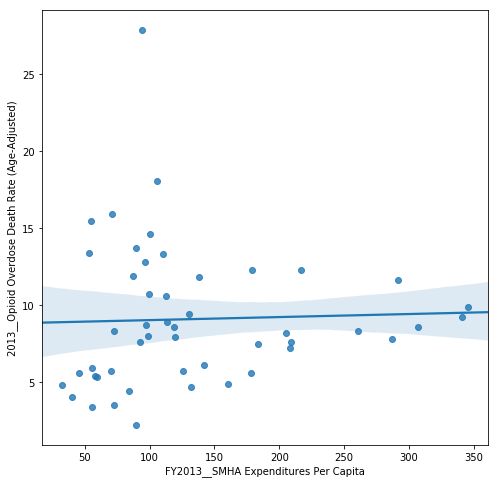

In [53]:

plt.figure(figsize=(8,8))
sns.regplot(x=DeathMental_df['FY2013__SMHA Expenditures Per Capita'],\
                           y=DeathMental_df['2013__Opioid Overdose Death Rate (Age-Adjusted)'])
plt.show()

In [54]:
# regression of 2013 opioid overdose deaths on 2013 state mental health agency expenditure per capita

y=DeathMental_df['2013__Opioid Overdose Death Rate (Age-Adjusted)']
x=DeathMental_df['FY2013__SMHA Expenditures Per Capita']
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                          
===========================================================================================================
Dep. Variable:     2013__Opioid Overdose Death Rate (Age-Adjusted)   R-squared:                       0.001
Model:                                                         OLS   Adj. R-squared:                 -0.020
Method:                                              Least Squares   F-statistic:                   0.05751
Date:                                             Fri, 05 Jan 2018   Prob (F-statistic):              0.812
Time:                                                     20:57:48   Log-Likelihood:                -143.34
No. Observations:                                               49   AIC:                             290.7
Df Residuals:                                                   47   BIC:                             294.5
Df Model:                                                        1                                         
Covariance Type:                                         nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    8.8255      1.276      6.915      0.000       6.258      11.393
FY2013__SMHA Expenditures Per Capita     0.0020      0.008      0.240      0.812      -0.015       0.019
==============================================================================
Omnibus:                       27.855   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.157
Skew:                           1.622   Prob(JB):                     1.43e-13
Kurtosis:                       7.296   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Extra #2: Rural vs. Urban crime

In [55]:
# opioid deaths and % urban by state. If state urban population in 2010 is >=75%, it is considered urban.  
    # dummy variables: urban state == 1, otherwise == 0
OpDeathsDelta_df['urban'] = np.where(OpDeathsDelta_df['2010']>=75, 1, 0)

OpDeathsDelta_df.head()

,Location,2000__Opioid Overdose Death Rate (Age-Adjusted),2010__Opioid Overdose Death Rate (Age-Adjusted),2010,Change in Death,urban
1,Alabama,1.0,4.1,59.0,3.1,0
2,Alaska,4.0,8.7,66.0,4.7,0
3,Arizona,4.8,9.9,89.8,5.1,1
4,Arkansas,0.8,6.8,56.2,6.0,0
5,California,3.0,5.0,95.0,2.0,1


In [56]:
# merge urban dummy with crime data

# change location to state for merging purposes
OpDeathsDelta_df = OpDeathsDelta_df.rename(columns={'Location':'State'})
UCrime_df = crime_df.merge(OpDeathsDelta_df, on='State')

UCrime_df.tail()


,State,Population_1999_x,Violent Crime rate_1999,Murder and nonnegligent manslaughter rate_1999,Legacy rape rate /1_1999,Revised rape rate /2_1999,Robbery rate_1999,Aggravated assault rate_1999,Unnamed: 8_1999,Population_2014_x,...,Burglary rate_2014,Larceny-theft rate_2014,Motor vehicle theft rate_2014,Unnamed: 6_2014,Property crime rate_change,2000__Opioid Overdose Death Rate (Age-Adjusted),2010__Opioid Overdose Death Rate (Age-Adjusted),2010,Change in Death,urban
39,Vermont,593740,113.9,2.9,22.9,NaN,10.9,77.1,NaN,626562,...,324.6,1160.8,38.9,NaN,-1180.3,3.6,6.8,38.9,3.2,0
40,Virginia,6872912,314.7,5.7,25.0,NaN,101.1,182.8,NaN,8326289,...,277.7,1560.5,92.1,NaN,-1129.0,3.4,4.8,75.5,1.4,1
41,Washington,5756361,377.3,3.0,47.1,NaN,100.9,226.3,NaN,7061530,...,783.0,2489.1,434.0,NaN,-1171.9,5.8,8.9,84.1,3.1,1
42,West Virginia,1806928,350.7,4.4,18.7,NaN,36.6,291.0,NaN,1850326,...,484.9,1447.3,102.5,NaN,-335.3,2.8,25.6,48.7,22.8,0
43,Wisconsin,5250446,245.8,3.4,20.1,NaN,84.7,137.6,NaN,5757564,...,368.5,1547.6,172.3,NaN,-962.0,2.1,7.3,70.2,5.2,0


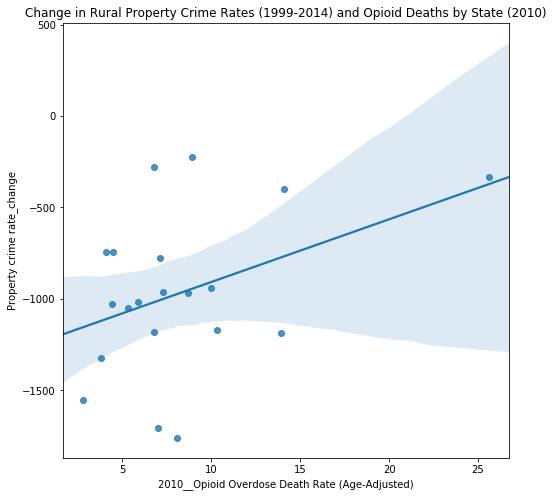

In [57]:
# scatter plot of change in property crime rates and opioid deaths in 2014 
    #where urban == 0

RCrime_df = UCrime_df[UCrime_df['urban'] == 0]

plt.figure(figsize=(8,8))
sns.regplot(x=RCrime_df['2010__Opioid Overdose Death Rate (Age-Adjusted)'],\
                   y=RCrime_df['Property crime rate_change'])

plt.title('Change in Rural Property Crime Rates (1999-2014) and Opioid Deaths by State (2010)')
plt.show()

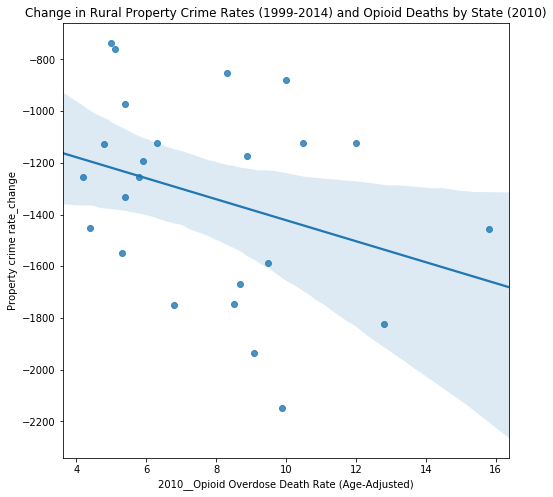

In [58]:
# scatter plot of change in property crime rates and opioid deaths in 2014 
    #where urban == 1

UrbCrime_df = UCrime_df[UCrime_df['urban'] == 1]

plt.figure(figsize=(8,8))
sns.regplot(x=UrbCrime_df['2010__Opioid Overdose Death Rate (Age-Adjusted)'],\
                   y=UrbCrime_df['Property crime rate_change'])

plt.title('Change in Rural Property Crime Rates (1999-2014) and Opioid Deaths by State (2010)')
plt.show()

In [59]:
# multivar reg on 'Change in Rural Property Crime Rates (1999-2014) and Opioid Deaths by State (2010)'

y= UCrime_df['Property crime rate_change']
x= UCrime_df[['Change in Death', 'urban']]
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Property crime rate_change   R-squared:                       0.227
Model:                                    OLS   Adj. R-squared:                  0.189
Method:                         Least Squares   F-statistic:                     6.022
Date:                        Fri, 05 Jan 2018   Prob (F-statistic):            0.00509
Time:                                20:57:48   Log-Likelihood:                -324.54
No. Observations:                          44   AIC:                             655.1
Df Residuals:                              41   BIC:                             660.4
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1138.4056    135.378     -8.409      0.000   -1411.807    -865.005
Change in Death    28.1421     16.677      1.687      0.099      -5.539      61.823
urban            -287.2462    130.196     -2.206      0.033    -550.183     -24.309
==============================================================================
Omnibus:                        0.819   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.664   Jarque-Bera (JB):                0.899
Skew:                          -0.272   Prob(JB):                        0.638
Kurtosis:                       2.558   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Research Question 4: clean up raw data and export

In [60]:
# read NHE spending csv into DF
nhe = "Data Files/Question_4/NHE2016/NHE2016.csv"
nhe_df = pd.read_csv(nhe,header = 1, thousands=',',engine='python')

nhe_df.head()

,Expenditure Amount (Millions),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Total National Health Expenditures,27214,29138,31842,34595,38394,41852,46081,51565,58402,...,2295307,2399121,2495414,2598823,2689349,2797260,2879008,3026157,3200815,3337248
1,Out of pocket,12949,13357,14255,15311,16928,18209,18594,18537,20500,...,290000,295184,293723,299742,309973,318330,325189,330068,339315,352537
2,Health Insurance,7497,8236,8999,9892,10971,12023,15673,21109,24379,...,1609250,1695968,1796424,1876922,1950187,2022904,2087804,2228136,2382770,2486842
3,Private Health Insurance,5812,6468,7178,7952,9052,10072,10296,10452,11830,...,776176,802857,832906,864344,898631,928211,946398,999940,1068778,1123372
4,Medicare,-,-,-,-,-,-,1842,4924,6218,...,432751,466971,498859,519787,544679,569634,590163,618889,648808,672093


In [61]:
# extract Total NHE and Total CMS Program rows
nhe_cms_df = nhe_df.loc[[0,35,36],]
nhe_cms_df = nhe_cms_df.set_index("Expenditure Amount (Millions)")

# set to numeric for plotting purposes
nhe_cms_df = nhe_cms_df.apply(pd.to_numeric, errors='ignore')

nhe_cms_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Expenditure Amount (Millions),,,,,,,,,,,,,,,,,,,,,
Total National Health Expenditures,27214,29138,31842,34595,38394,41852,46081,51565,58402,65923,...,2295307,2399121,2495414,2598823,2689349,2797260,2879008,3026157,3200815,3337248
"Total CMS Programs (Medicaid, CHIP and Medicare)",-,-,-,-,-,-,3146,8065,9759,11220,...,767613,821394,884386,928553,963412,1004951,1049032,1128749,1207734,1254525
POPULATION,186,189,192,195,197,200,202,204,206,208,...,301,304,306,309,311,313,316,318,320,322


In [62]:
# extract Total NHE and Total CMS Program rows
nhe_cms_df = nhe_df.loc[[0,35,36],]
nhe_cms_df = nhe_cms_df.set_index("Expenditure Amount (Millions)")

# set to numeric for plotting purposes
nhe_cms_df = nhe_cms_df.apply(pd.to_numeric, errors='ignore')

nhe_cms_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Expenditure Amount (Millions),,,,,,,,,,,,,,,,,,,,,
Total National Health Expenditures,27214,29138,31842,34595,38394,41852,46081,51565,58402,65923,...,2295307,2399121,2495414,2598823,2689349,2797260,2879008,3026157,3200815,3337248
"Total CMS Programs (Medicaid, CHIP and Medicare)",-,-,-,-,-,-,3146,8065,9759,11220,...,767613,821394,884386,928553,963412,1004951,1049032,1128749,1207734,1254525
POPULATION,186,189,192,195,197,200,202,204,206,208,...,301,304,306,309,311,313,316,318,320,322


In [63]:
# Extract series of spending data 1999 - 2016 to compare against opioid deaths
cms_spending = nhe_cms_df.loc['Total CMS Programs (Medicaid, CHIP and Medicare)','1999':'2016']
nhe_spending = nhe_cms_df.loc['Total National Health Expenditures','1999':'2016']

In [64]:
# plot CMS spending dataframes
plt.figure(figsize = (17,10))                                                # sets bar chart parameters
plt.title('Total CMS Programs Expenditures: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Expenditure Amount (Millions)', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds1_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, cms_spending, color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds1_df['Year Code'], rotation="horizontal")

plt.show()

NameError: name 'year_min' is not defined

In [ ]:
# plot NHE spending dataframes
plt.figure(figsize = (17,10))                                                # sets bar chart parameters
plt.title('Total National Health Expenditures: 1999-2016: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Expenditure Amount (Millions)', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds1_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, nhe_spending, color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, nhe_spending, rotation="horizontal")

plt.show()

In [ ]:
# plot CMS spending as percentage of NHE
plt.figure(figsize = (17,10))                                                # sets bar chart parameters
plt.title('Total CMS Programs Expenditure as a Percentage of NHE: %s to %s' % (year_min, year_max), fontdict = {'fontsize': 20})
plt.xlabel('Year', fontdict = {'fontsize': 16})
plt.ylabel('Expenditure Amount (Millions)', fontdict = {'fontsize': 16})
xvals = np.arange(len(q1ds1_df))
tick_locations = [value+0.4 for value in xvals]
plt.bar(xvals, cms_spending / nhe_spending, color='r', alpha=0.7, align="edge")
plt.xticks(tick_locations, q1ds1_df['Year Code'], rotation="horizontal")

plt.show()